In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
chances = pd.read_csv("https://raw.githubusercontent.com/GabrielVCoutinho/Projeto-ICD-2022.2/main/DataSetICD/attempts.csv")
chances = chances.drop(labels="serial", axis=1)

keyStats = pd.read_csv("https://raw.githubusercontent.com/GabrielVCoutinho/Projeto-ICD-2022.2/main/DataSetICD/key_stats.csv")
keyStats = keyStats.iloc[:,0:7]

disciplin = pd.read_csv("https://raw.githubusercontent.com/GabrielVCoutinho/Projeto-ICD-2022.2/main/DataSetICD/disciplinary.csv")
disciplin = disciplin.drop(labels="serial", axis=1)
disciplin = disciplin.iloc[:,0:4]

defesa = pd.read_csv("https://raw.githubusercontent.com/GabrielVCoutinho/Projeto-ICD-2022.2/main/DataSetICD/defending.csv")
defesa = defesa.drop(labels="serial", axis=1)


In [4]:
pd.set_option('display.max_rows', None)
UCLdataset = pd.merge(chances, keyStats, how='outer')
UCLdataset = pd.merge(UCLdataset, disciplin, how='outer')
UCLdataset = pd.merge(UCLdataset, defesa, how='outer')

# Medidas de centralidade e dispersão

## Chute a gol:

In [5]:
NoAlvo = UCLdataset["on_target"]


In [6]:
meanNoAlvo = NoAlvo.mean("on_target")
meanNoAlvo

1.967032967032967

In [7]:
modaNoAlvo = NoAlvo.mode("on_target")
modaNoAlvo

0    0.0
Name: on_target, dtype: float64

In [8]:
medianaNoAlvo = NoAlvo.median("on_target")
medianaNoAlvo

1.0

In [9]:
varNoAlvo = NoAlvo.var()
varNoAlvo

8.703498336525998

In [10]:
desvNoAlvo = NoAlvo.std()
desvNoAlvo

2.9501692047280947

<AxesSubplot:>

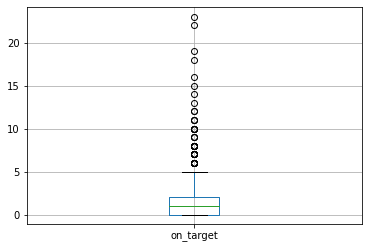

In [11]:
UCLdataset.boxplot('on_target')

## Chutes bloqueados:

In [12]:
block = UCLdataset["blocked"]

In [13]:
meanblock = block.mean()
meanblock

1.445054945054945

In [14]:
modablock = block.mode()
modablock

0    0.0
Name: blocked, dtype: float64

In [15]:
medianablock = block.median()
medianablock

1.0

In [16]:
varblock = block.var()
varblock

3.5942232079846126

In [17]:
desvblock = block.std()
desvblock

1.895843666546536

<AxesSubplot:>

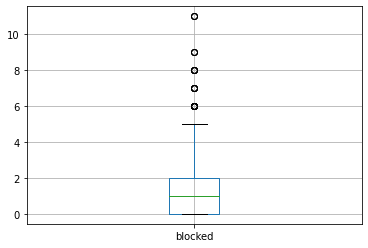

In [18]:
UCLdataset.boxplot('blocked')

## Minutos jogados:

In [19]:
MP = UCLdataset["minutes_played"]

In [20]:
meanMP = MP.mean()
meanMP

331.61178045515396

In [21]:
modaMP = MP.mode()
modaMP

0    540.0
Name: minutes_played, dtype: float64

In [22]:
medianaMP = MP.median()
medianaMP

301.0

In [23]:
varMP = MP.var()
varMP

61688.61583958714

In [24]:
desvMP = MP.std()
desvMP

248.37193045830912

<AxesSubplot:>

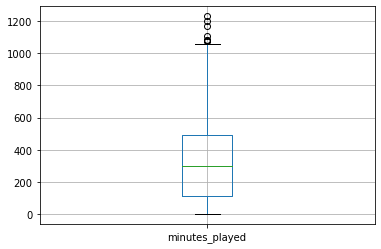

In [26]:
UCLdataset.boxplot("minutes_played")

## Gols:

In [27]:
Gols = UCLdataset["goals"]

In [28]:
meanGols = Gols.mean()
meanGols

0.4926372155287818

In [29]:
modaGols = Gols.mode()
modaGols

0    0.0
Name: goals, dtype: float64

In [30]:
medianaGols = Gols.median()
medianaGols

0.0

In [31]:
varGols = Gols.var()
varGols

1.7248116684790613

In [32]:
desvGols = Gols.std()
desvGols

1.3133208551146447

<AxesSubplot:>

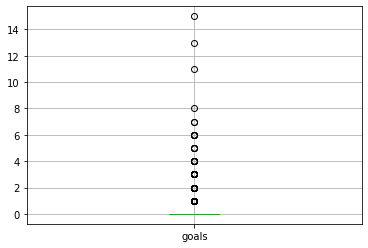

In [33]:
UCLdataset.boxplot('goals')

## Faltas cometidas:

In [34]:
Foul = UCLdataset["fouls_committed"]

In [35]:
meanFouls = Foul.mean()
meanFouls

4.960616438356165

In [36]:
modaFouls = Foul.mode()
modaFouls

0    1.0
Name: fouls_committed, dtype: float64

In [37]:
medianaFouls = Foul.median()
medianaFouls

4.0

In [38]:
varFouls = Foul.var()
varFouls

14.250590356916263

In [39]:
desvFoul = Foul.std()
desvFoul

3.774995411509299

<AxesSubplot:>

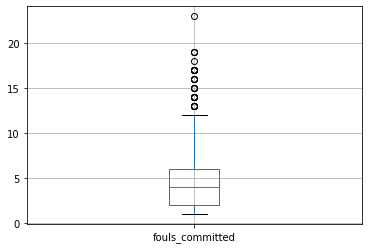

In [40]:
UCLdataset.boxplot('fouls_committed')

## Divididas de bola:

In [41]:
Bote = UCLdataset["tackles"]

In [42]:
meanBote = Bote.mean()
meanBote


4.732057416267943

In [43]:
modaBote = Bote.mode()
modaBote

0    1.0
Name: tackles, dtype: float64

In [44]:
medianaBote = Bote.median()
medianaBote

3.0

In [45]:
varBote = Bote.var()
varBote

25.12937004142646

In [46]:
desvBote = Bote.std()
desvBote

5.012920310699788

<AxesSubplot:>

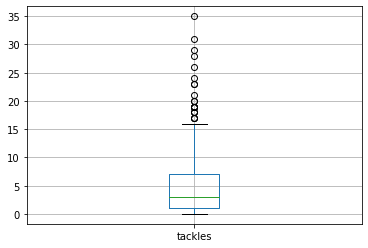

In [47]:
UCLdataset.boxplot('tackles')

## Divididas perdidas:

In [48]:
L_botes = UCLdataset["t_lost"]

In [49]:
meanL_botes = L_botes.mean()
meanL_botes

2.66347687400319

In [50]:
modaL_botes = L_botes.mode()
modaL_botes

0    0.0
Name: t_lost, dtype: float64

In [51]:
medianaL_botes = L_botes.median()
medianaL_botes

2.0

In [52]:
varL_botes = L_botes.var()
varL_botes

8.498392364879718

In [53]:
desvL_botes = L_botes.std()
desvL_botes

2.9152002272364963

<AxesSubplot:>

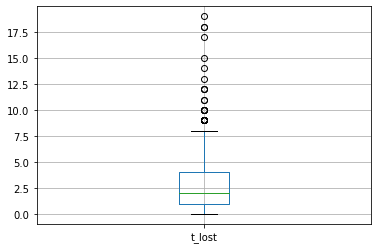

In [54]:
UCLdataset.boxplot('t_lost')

## Total de chutes a gol:

In [55]:
totalChutes = UCLdataset["total_attempts"]

In [56]:
meantotalChutes = totalChutes.mean()
meantotalChutes

5.653846153846154

In [57]:
modetotalChutes = totalChutes.mode()
modetotalChutes

0    1.0
Name: total_attempts, dtype: float64

In [58]:
medianatotalChutes = totalChutes.median()
medianatotalChutes

4.0

In [59]:
vartotalChutes = totalChutes.var()
vartotalChutes

37.44876499647125

In [60]:
desvtotalChutes = totalChutes.std()
desvtotalChutes

6.119539606577544

<AxesSubplot:>

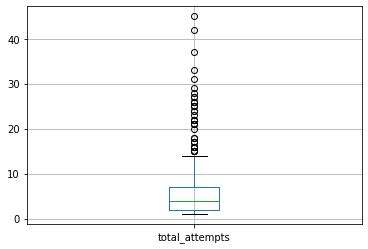

In [61]:
UCLdataset.boxplot('total_attempts')

## Chutes para fora:

In [62]:
chutesfora = UCLdataset["off_target"]

In [63]:
meanchutesfora = chutesfora.mean()
meanchutesfora

2.241758241758242

In [64]:
modechutesfora = chutesfora.mode()
modechutesfora

0    1.0
Name: off_target, dtype: float64

In [65]:
medianachutesfora = chutesfora.median()
medianachutesfora

1.0

In [66]:
varchutesfora = chutesfora.var()
varchutesfora

5.299243875390716

In [67]:
desvchutesfora = chutesfora.std()
desvchutesfora

2.302008661015574

<AxesSubplot:>

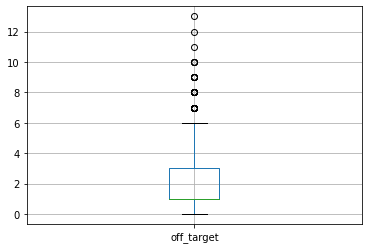

In [68]:
UCLdataset.boxplot('off_target')

## Partidas jogadas:

In [69]:
jogadas = UCLdataset["match_played"]

In [70]:
meanjogadas = jogadas.mean()
meanjogadas

5.11968085106383

In [71]:
modejogadas = jogadas.mode()
modejogadas

0    6.0
Name: match_played, dtype: float64

In [72]:
medianajogadas = jogadas.median()
medianajogadas

5.0

In [73]:
varjogadas = jogadas.var()
varjogadas

7.559558886024282

In [74]:
desvjogadas = jogadas.std()
desvjogadas

2.7494652000024082

<AxesSubplot:>

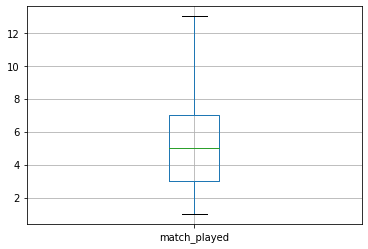

In [75]:
UCLdataset.boxplot('match_played')

## Assistências:

In [76]:
assists = UCLdataset["assists"]

In [77]:
meanassists = assists.mean()
meanassists

0.37617135207496655

In [78]:
modeassists = assists.mode()
modeassists

0    0.0
Name: assists, dtype: float64

In [79]:
medianaassists = assists.median()
medianaassists

0.0

In [80]:
varassists = assists.var()
varassists

0.7148737936554191

In [81]:
desvassists = assists.std()
desvassists

0.8455020955949306

<AxesSubplot:>

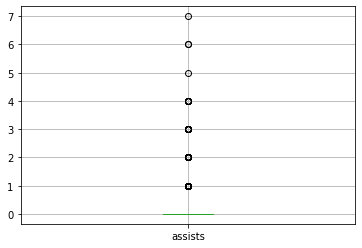

In [82]:
UCLdataset.boxplot('assists')

## Recuperação de posse:

In [83]:
rtrnposse = UCLdataset['balls_recoverd']

In [84]:
meanrtrnposse = rtrnposse.mean()
meanrtrnposse

16.406698564593302

In [85]:
modertrnposse = rtrnposse.mode()
modertrnposse

0    1.0
Name: balls_recoverd, dtype: float64

In [86]:
medianartrnposse = rtrnposse.median()
medianartrnposse

12.0

In [87]:
varrtrnposse = rtrnposse.var()
varrtrnposse

217.87746304477378

In [88]:
desvrtrnposse = rtrnposse.std()
desvrtrnposse

14.760672852034007

<AxesSubplot:>

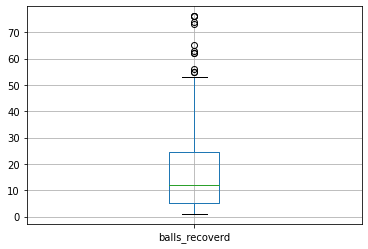

In [89]:
UCLdataset.boxplot('balls_recoverd')

## Divididas Perdidas:

In [90]:
W_botes = UCLdataset["t_won"]

In [91]:
meanW_botes = W_botes.mean()
meanW_botes

2.068580542264753

In [92]:
modaW_botes = W_botes.mode()
modaW_botes

0    0.0
Name: t_won, dtype: float64

In [93]:
desvW_botes = W_botes.std()
desvW_botes

2.6074515475796325

In [94]:
medianaW_botes = W_botes.median()
medianaW_botes

1.0

In [95]:
varW_botes = W_botes.var()
varW_botes

6.798803572975421

<AxesSubplot:>

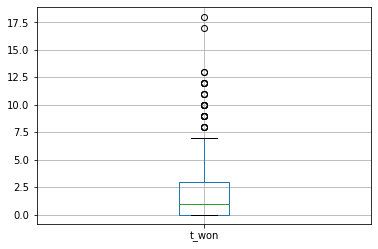

In [96]:
UCLdataset.boxplot('t_won')

## Chutes Bloqueados:

In [97]:
chutesBlock = UCLdataset["blocked"]

In [98]:
meanchutesBlock = chutesBlock.mean()
meanchutesBlock

1.445054945054945

In [99]:
modechutesBlock = chutesBlock.mode()
modechutesBlock

0    0.0
Name: blocked, dtype: float64

In [100]:
medianachutesBlock = chutesBlock.median()
medianachutesBlock

1.0

In [101]:
desvchutesBlock = chutesBlock.std()
desvchutesBlock

1.895843666546536

In [102]:
varchutesBlock = chutesBlock.var()
varchutesBlock

3.5942232079846126

<AxesSubplot:>

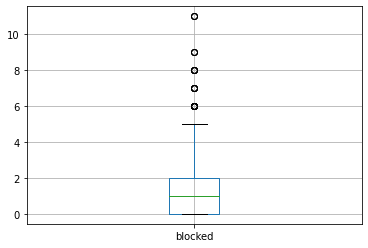

In [103]:
UCLdataset.boxplot('blocked')

## Visualização gráfica:

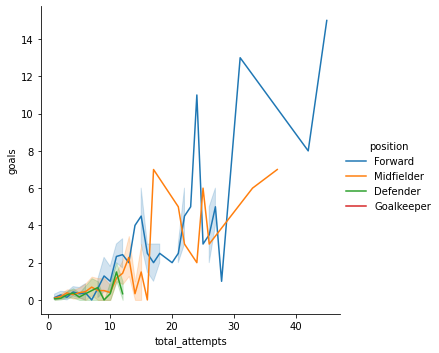

In [104]:
sns.relplot(data=UCLdataset, x="total_attempts", y="goals", kind="line", hue="position")

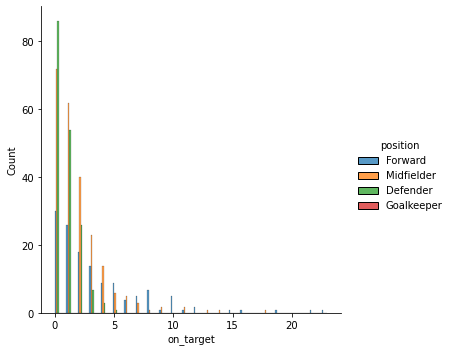

In [105]:
sns.displot(UCLdataset, x="on_target", hue="position", multiple="dodge")

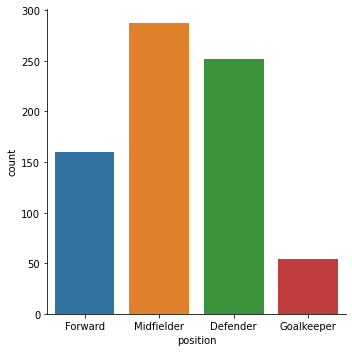

In [106]:
sns.catplot(data=UCLdataset, x="position", kind="count")

## Clusterização:

In [107]:
NanUCLdataset = UCLdataset.dropna(axis=0).reset_index(drop=True)

In [108]:
disps = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(NanUCLdataset.iloc[:,3:])
    disps.append(kmeans.inertia_)

<AxesSubplot:>

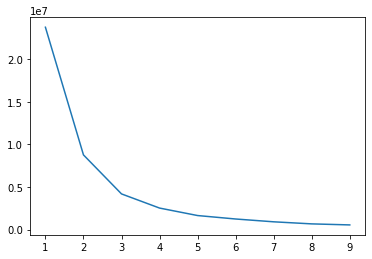

In [109]:
sns.lineplot(x=range(1,10), y=disps)

In [110]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(NanUCLdataset.iloc[:,3:])

KMeans(n_clusters=3)

<AxesSubplot:xlabel='match_played', ylabel='fouls_committed'>

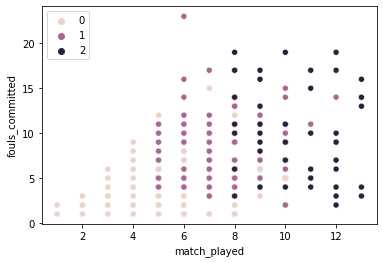

In [111]:
sns.scatterplot(data=NanUCLdataset, x='match_played', y='fouls_committed', hue=kmeans.labels_ )

<AxesSubplot:xlabel='total_attempts', ylabel='goals'>

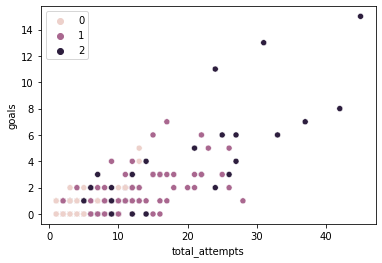

In [112]:
sns.scatterplot(data=NanUCLdataset, x='total_attempts', y='goals', hue=kmeans.labels_ )

<AxesSubplot:xlabel='match_played', ylabel='minutes_played'>

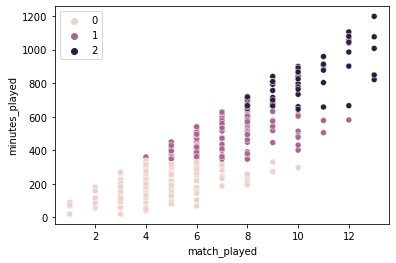

In [113]:
sns.scatterplot(data=NanUCLdataset, x='match_played', y='minutes_played', hue=kmeans.labels_ )

# Estatísticas dos times:

In [114]:
df1 = UCLdataset.groupby('club').mean(numeric_only=False)
df_attempts = df1.loc[:, 'total_attempts']
df_attempts = df_attempts.sort_values(ascending=False)
df_attempts.head(5)

club
Bayern         11.294118
Man. City      10.157895
Liverpool      10.150000
Real Madrid     9.944444
Chelsea         7.952381
Name: total_attempts, dtype: float64

In [115]:
df_matchplayed = df1.loc[:, 'match_played']
df_matchplayed.sort_values(ascending=False).head(5)

club
Real Madrid    7.880000
Liverpool      7.448276
Villarreal     7.360000
Atlético       7.181818
Man. City      6.730769
Name: match_played, dtype: float64

In [116]:
df_goals = df1.loc[:, 'goals']
df_goals.sort_values(ascending=False).head(5)

club
Bayern         1.250000
Real Madrid    1.120000
Man. City      1.076923
Ajax           1.050000
Liverpool      1.000000
Name: goals, dtype: float64

In [117]:
df_assists = df1.loc[:, 'assists']
df_assists.sort_values(ascending=False).head(5)

club
Bayern         1.000000
Man. City      0.884615
Ajax           0.850000
Real Madrid    0.840000
Liverpool      0.821429
Name: assists, dtype: float64

In [118]:
df_fouls = df1.loc[:, 'fouls_committed']
df_fouls.sort_values(ascending=False).head(5)

club
Salzburg       8.062500
Ajax           7.312500
Chelsea        7.052632
Atlético       6.950000
Real Madrid    6.666667
Name: fouls_committed, dtype: float64

In [119]:
df_ballsrecovered = df1.loc[:, 'balls_recoverd']
df_ballsrecovered.sort_values(ascending=False).head(5)

club
Real Madrid    24.476190
Liverpool      24.083333
Atlético       23.700000
Bayern         23.105263
Man. City      21.333333
Name: balls_recoverd, dtype: float64

In [120]:
df_tackles = df1.loc[:, 'tackles']
df_tackles.sort_values(ascending=False).head(5)

club
Real Madrid    7.904762
Benfica        7.578947
Atlético       6.600000
Paris          6.529412
Sheriff        6.312500
Name: tackles, dtype: float64

In [121]:
df_clearance = df1.loc[:, 'clearance_attempted']
df_clearance.sort_values(ascending=False).head(5)

club
Villarreal     12.454545
Sheriff        11.437500
Benfica        10.894737
Atlético        9.500000
Real Madrid     8.952381
Name: clearance_attempted, dtype: float64

## Eficiências de chute ao gol:

In [122]:
df2 = UCLdataset[UCLdataset['position'] != 'Defender']
df2 = df2[df2['position'] != 'Goalkeeper']
df2 = df2[['player_name', 'club', 'position', 'total_attempts', 'goals']]

In [123]:
df2['efficiency'] = (df2['goals'] / df2['total_attempts']) * 100
df2 = df2[df2['total_attempts'] > 4]
df2.sort_values('efficiency', ascending=False).head(10)

,player_name,club,position,total_attempts,goals,efficiency
15,Haller,Ajax,Forward,24.0,11.0,45.833333
97,Jesus,Man. City,Forward,9.0,4.0,44.444444
132,Bernardo Silva,Man. City,Midfielder,7.0,3.0,42.857143
130,Okafor,Salzburg,Midfielder,7.0,3.0,42.857143
4,Lewandowski,Bayern,Forward,31.0,13.0,41.935484
27,Nkunku,Leipzig,Midfielder,17.0,7.0,41.176471
192,Steffen,Wolfsburg,Midfielder,5.0,2.0,40.000000
80,Werner,Chelsea,Forward,10.0,4.0,40.000000
37,Núñez,Benfica,Forward,15.0,6.0,40.000000
46,Firmino,Liverpool,Midfielder,13.0,5.0,38.461538


## Relação desarme falta dos jogadores:

In [124]:
df3 = UCLdataset[['player_name', 'club', 'position', 'tackles', 'fouls_committed']]
df3['fouls/tackles'] = (df3['fouls_committed'] / df3['tackles']) * 100
df3 = df3[df3['fouls/tackles'] <= 800]
df3.sort_values('fouls/tackles', ascending=False).head(10)

,player_name,club,position,tackles,fouls_committed,fouls/tackles
585,Burak Yılmaz,LOSC,Forward,1.0,8.0,800.0
84,Siebatcheu,Young Boys,Forward,1.0,7.0,700.0
446,Kulusevski,Juventus,Midfielder,1.0,6.0,600.0
260,Fati,Barcelona,Forward,1.0,6.0,600.0
108,Tetê,Shakhtar Donetsk,Forward,1.0,6.0,600.0
38,Perišić,Inter,Midfielder,1.0,6.0,600.0
12,Danjuma,Villarreal,Midfielder,1.0,6.0,600.0
279,Chukwueze,Villarreal,Midfielder,1.0,6.0,600.0
82,Elia,Young Boys,Forward,1.0,6.0,600.0
63,Tadić,Ajax,Forward,2.0,11.0,550.0


<AxesSubplot:xlabel='tackles', ylabel='fouls_committed'>

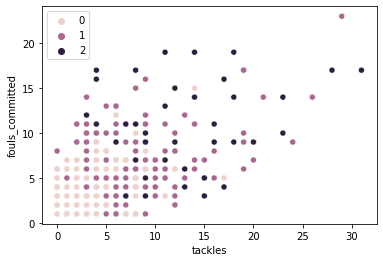

In [125]:
sns.scatterplot(data=NanUCLdataset, x='tackles', y='fouls_committed', hue=kmeans.labels_ )

# Relatório - Champions League

Gabriel Vieira, Gustavo Henrique de Carvalho

### A UEFA Champions League é uma competição anual de clubes de futebol a nível continental, organizada pela União das Associações Europeias de Futebol (UEFA) e disputada por clubes europeus. É um dos torneios mais prestigiados do mundo e a competição de clubes mais prestigiada no futebol europeu, disputada pelas equipes mais bem classificadas nos respectivos campeonato nacionais na temporada anterior, sendo o número de vagas atribuído consoante o ranking da UEFA. A final da Liga dos Campeões da UEFA é o evento esportivo anual mais visto em todo o mundo. Por conta do alto nível tecnico decidimos que esta seria uma competição adequada para se realizar uma análise de dados com a finalidade de encontrar os melhores clubes e jogadores do mundo.

### O dataset contem estatísticas dos jogadores da UEFA Champions League temporada 2021-22. O dataset está dividido em sete partes, sendo elas:
    Attacking: Contém as estatísticas de ataque como assistências, dribles e impedimentos.
    Attempts: Contém as estatísticas de tentativas de gol como chutes totais, chutes a gol, chutes para fora, gols, etc.
    Defending: Contém as estatísticas de defesa como divididas ganhas, perdidas e recuperação de bola.
    Disciplinary: Contém as estatísticas de disciplina dos jogadores como faltas cometidas e sofridas, além dos cartões que 
    o jogador recebeu.
    Distribution: Contém as estatísticas de passes como tentativas de passe, passes completos, precisão de passe, etc.
    Goalkeeping: Contém as estatísticas dos goleiros como gols salvos, penaltis salvos e espalmos.
    Goals: Contém as estatísticas de gols dos jogadores como perna esquerda e direita, cabeçadas e gols de dentro da área.
    Key stats: Reune as principais estátisticas dos jogadores como o número de partidas e minutos jogados.
    
    

### Decidimos juntar as tabelas em uma só para analisar correlações entre os dados, que estavam distribuídos entre as sete tabelas preexistentes. Além disso, retiramos colunas que continham dados que não seriam úteis para nossa análise como as colunas referentes as estatísticas de goleiros.

## 1. Qual é o time com os jogadores com melhores estatísticas?

### Aqui buscamos os times que tivessem as melhores estatísticas coletivas usando as médias os dados de tentativas de chute a gol, divididas de bola, gols, assistências, bolas recuperadas, faltas cometidas e bolas afastadas do gol.

In [126]:
df1 = UCLdataset.groupby('club').mean()
df_attempts = df1.loc[:, 'total_attempts']
df_attempts.sort_values(ascending=False).head(5)

club
Bayern         11.294118
Man. City      10.157895
Liverpool      10.150000
Real Madrid     9.944444
Chelsea         7.952381
Name: total_attempts, dtype: float64

In [127]:
df_matchplayed = df1.loc[:, 'match_played']
df_matchplayed.sort_values(ascending=False).head(5)

club
Real Madrid    7.880000
Liverpool      7.448276
Villarreal     7.360000
Atlético       7.181818
Man. City      6.730769
Name: match_played, dtype: float64

In [128]:
df_goals = df1.loc[:, 'goals']
df_goals.sort_values(ascending=False).head(5)

club
Bayern         1.250000
Real Madrid    1.120000
Man. City      1.076923
Ajax           1.050000
Liverpool      1.000000
Name: goals, dtype: float64

In [129]:
df_assists = df1.loc[:, 'assists']
df_assists.sort_values(ascending=False).head(5)

club
Bayern         1.000000
Man. City      0.884615
Ajax           0.850000
Real Madrid    0.840000
Liverpool      0.821429
Name: assists, dtype: float64

In [130]:
df_fouls = df1.loc[:, 'fouls_committed']
df_fouls.sort_values(ascending=False).head(5)

club
Salzburg       8.062500
Ajax           7.312500
Chelsea        7.052632
Atlético       6.950000
Real Madrid    6.666667
Name: fouls_committed, dtype: float64

In [131]:
df_ballsrecovered = df1.loc[:, 'balls_recoverd']
df_ballsrecovered.sort_values(ascending=False).head(5)

club
Real Madrid    24.476190
Liverpool      24.083333
Atlético       23.700000
Bayern         23.105263
Man. City      21.333333
Name: balls_recoverd, dtype: float64

In [132]:
df_tackles = df1.loc[:, 'tackles']
df_tackles.sort_values(ascending=False).head(5)

club
Real Madrid    7.904762
Benfica        7.578947
Atlético       6.600000
Paris          6.529412
Sheriff        6.312500
Name: tackles, dtype: float64

In [133]:
df_clearance = df1.loc[:, 'clearance_attempted']
df_clearance.sort_values(ascending=False).head(5)

club
Villarreal     12.454545
Sheriff        11.437500
Benfica        10.894737
Atlético        9.500000
Real Madrid     8.952381
Name: clearance_attempted, dtype: float64

### Observando as tabelas percebemos que o Real Madrid foi o time que mais apareceu nas tabelas com a média das estatísticas dos jogadores de seus respectivos times, levando a conclusão que foi um dos melhores times do campeonato.

## 2. Quais são os atacantes com melhores eficiências de chute ao gol?

In [134]:
df2 = UCLdataset[UCLdataset['position'] != 'Defender']
df2 = df2[df2['position'] != 'Goalkeeper']
df2 = df2[['player_name', 'club', 'position', 'total_attempts', 'goals']]

In [135]:
df2['efficiency'] = (df2['goals'] / df2['total_attempts']) * 100
df2['score'] = (df2['efficiency'] * df2['goals']) / 10
df2.sort_values('efficiency', ascending=False).head(10)

,player_name,club,position,total_attempts,goals,efficiency,score
467,Ozdoev,Zenit,Midfielder,1.0,1.0,100.000000,10.000000
459,Messias Junior,Milan,Forward,1.0,1.0,100.000000,10.000000
451,Rafael Leão,Milan,Forward,1.0,1.0,100.000000,10.000000
450,Kjærgaard,Salzburg,Midfielder,1.0,1.0,100.000000,10.000000
446,Kulusevski,Juventus,Midfielder,1.0,1.0,100.000000,10.000000
441,Klaassen,Ajax,Midfielder,1.0,1.0,100.000000,10.000000
279,Chukwueze,Villarreal,Midfielder,3.0,2.0,66.666667,13.333333
227,Szoboszlai,Leipzig,Midfielder,4.0,2.0,50.000000,10.000000
355,Palmer,Man. City,Midfielder,2.0,1.0,50.000000,5.000000
231,Jorginho,Chelsea,Midfielder,4.0,2.0,50.000000,10.000000


In [136]:
df2.sort_values('score', ascending=False).head(5)

,player_name,club,position,total_attempts,goals,efficiency,score
4,Lewandowski,Bayern,Forward,31.0,13.0,41.935484,54.516129
15,Haller,Ajax,Forward,24.0,11.0,45.833333,50.416667
0,Benzema,Real Madrid,Forward,45.0,15.0,33.333333,50.000000
27,Nkunku,Leipzig,Midfielder,17.0,7.0,41.176471,28.823529
37,Núñez,Benfica,Forward,15.0,6.0,40.000000,24.000000


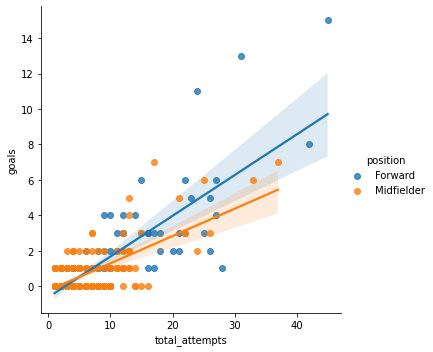

In [144]:
sns.lmplot(x="total_attempts", y="goals", data=df2, hue='position')

### Usando os dados de tentativas totais e gols podemos traçar a eficiência percentual de chute a gol dos jogadores, no qual o Haller, atacante do Ajax, se destacou por possuir 24 tentativas de gol e uma taxa de conversão de 45.8%. Nós tambem filtramos os jogadores que tinham menos que 4 tentativas de gol já que geravam taxas de eficiência muito altas, que muitas vezes não refletiam a qualidade do jogador e ofuscavam jogadores como Lewandowski que tinha 31 tentativas de gol e uma taxa de conversão de 41.9%.

## 3. Qual é a relação desarme falta dos jogadores?

In [139]:
df3 = UCLdataset[['player_name', 'club', 'position', 'tackles', 'fouls_committed']]
df3['fouls/tackles'] = (df3['fouls_committed'] / df3['tackles']) 
df3 = df3[df3['fouls/tackles'] <= 800]
df3.sort_values('fouls/tackles', ascending=False).head(10)

,player_name,club,position,tackles,fouls_committed,fouls/tackles
585,Burak Yılmaz,LOSC,Forward,1.0,8.0,8.0
84,Siebatcheu,Young Boys,Forward,1.0,7.0,7.0
446,Kulusevski,Juventus,Midfielder,1.0,6.0,6.0
260,Fati,Barcelona,Forward,1.0,6.0,6.0
108,Tetê,Shakhtar Donetsk,Forward,1.0,6.0,6.0
38,Perišić,Inter,Midfielder,1.0,6.0,6.0
12,Danjuma,Villarreal,Midfielder,1.0,6.0,6.0
279,Chukwueze,Villarreal,Midfielder,1.0,6.0,6.0
82,Elia,Young Boys,Forward,1.0,6.0,6.0
63,Tadić,Ajax,Forward,2.0,11.0,5.5


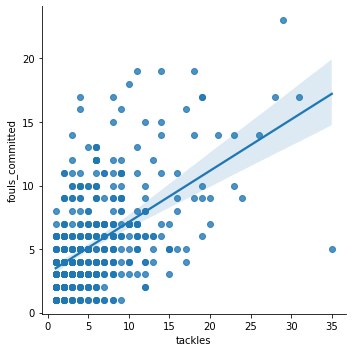

In [140]:
sns.lmplot(x="tackles", y="fouls_committed", data=df3)

<AxesSubplot:xlabel='tackles', ylabel='fouls_committed'>

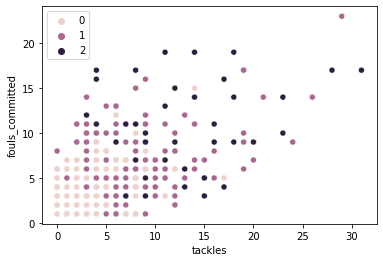

In [141]:
sns.scatterplot(data=NanUCLdataset, x='tackles', y='fouls_committed', hue=kmeans.labels_ )

### Inicialmente não foi possível estabelecer uma relação entre faltas e divididas pois muitos jogadores tinham poucas divididas e muitas faltas. Porém, usando KMeans e regressão linear, um método de clusterização, foi possível indentificar que quanto menos divididas de bolas menor é a tendência do jogador cometer uma falta.

# Conclusão:

## Utilizando da análise de dados e das ferramentas aprendidas na disciplina de Introdução a Ciência de Dados foi possível indentificar padrões e comportamentos dos jogadores e correlações entre as estatísticas apresentadas pelo dataset. Como visto, no caso dos clubes, o Real Madrid se destacou em todas as estatísticas coletivas e consequentemente ganhou o campeonato em questão. Além disso, diferente do coletivo as estatísticas não apontam nenhum jogador em específico do Real Madrid acima da média, mostrando que o mérito do Real Madrid foi o jogo coletivo e o trabalho em equipe.